In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
os.getcwd()


'/content'

In [0]:
import json

In [0]:
os.chdir('/content/drive/My Drive/project')

In [0]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn import model_selection
import nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import warnings
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pylab as pl

In [0]:
data = pd.read_json("../project/dataset.json",lines=True)


In [0]:
data.columns

Index(['article_link', 'headline', 'is_sarcastic'], dtype='object')

In [0]:
print(data.shape)
#print(data.describe())

(26709, 3)
       is_sarcastic
count  26709.000000
mean       0.438953
std        0.496269
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


In [0]:
data.head(10)


,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0


In [0]:
data.drop(columns=['article_link'], inplace=True)

In [0]:
labels = data['is_sarcastic']
print(labels.value_counts())

0    14985
1    11724
Name: is_sarcastic, dtype: int64


In [0]:
processed = data['headline'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',' ')
processed = processed.str.replace(r'[^\w\d\s]', ' ')
processed = processed.str.replace(r'\s+', ' ')
processed = processed.str.replace(r'^\s+|\s+?$', ' ')
processed = processed.str.replace(r'\d+',' ')
processed = processed.str.lower()

In [0]:
stop_words = set(stopwords.words('english'))
processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [0]:
 import nltk
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
all_words = []
for txt in processed:
    words = word_tokenize(txt)
    for w in words:
        all_words.append(w)

all_words = nltk.FreqDist(all_words)

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))

Number of words: 24764
Most common words: [('trump', 1684), ('new', 1523), ('man', 1395), ('year', 552), ('one', 541), ('report', 515), ('area', 491), ('woman', 481), ('donald', 474), ('u', 473), ('day', 471), ('says', 453), ('time', 439), ('first', 435), ('obama', 420)]


In [0]:
word_features = list(all_words.keys())[:5000]

In [0]:
def find_features(headings):
    words = word_tokenize(headings)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

In [0]:
headings = list(zip(processed, data['is_sarcastic']))
headings[0]

('former versace store clerk sues secret black code minority shoppers', 0)

In [0]:
featuresets = [(find_features(text), label) for (text, label) in headings]

In [0]:
training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, random_state=0)
print("Training set:", len(training))
print("Testing set:", len(testing))

Training set: 20031
Testing set: 6678


In [0]:
model = MultinomialNB()

In [0]:
nltk_model = SklearnClassifier(model)
nltk_model.train(training)
accuracy = nltk.classify.accuracy(nltk_model, testing)*100
print("Naive Bayes Accuracy: {}".format(accuracy))

Naive Bayes Accuracy: 77.44833782569631


In [0]:
txt_features, labels = list(zip(*testing))
prediction = nltk_model.classify_many(txt_features)

In [0]:
print(classification_report(labels, prediction))
df = pd.DataFrame(
    confusion_matrix(labels, prediction),
    index = [['actual', 'actual'], ['Sarcasm','Not Sarcasm']],
    columns = [['predicted', 'predicted'], ['Sarcasm','Not Sarcasm']])
print(df)

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      3739
           1       0.76      0.72      0.74      2939

    accuracy                           0.77      6678
   macro avg       0.77      0.77      0.77      6678
weighted avg       0.77      0.77      0.77      6678

                   predicted            
                     Sarcasm Not Sarcasm
actual Sarcasm          3051         688
       Not Sarcasm       818        2121


In [0]:
sarc=[];
no_sarc=[];
unifyy = list(zip(prediction, txt_features, labels))
for p, t, l in unifyy:
    for key, value in t.items():
        if value==True and l==p==0:
            no_sarc.append(key)
            break
        elif value==True and l==p==1:
            sarc.append(key)
            break
print("Sarcasm Words:", sarc)
print("Not Sarcasm Words:", no_sarc)


Sarcasm Words: ['ceo', 'stars', 'box', 'school', 'opening', 'like', 'area', 'denies', 'baby', 'man', 'sure', 'mom', 'first', 'congress', 'world', 'company', 'single', 'political', 'forward', 'nation', 'nation', 'man', 'man', 'scientists', 'raise', 'mom', 'come', 'church', 'worse', 'man', 'congress', 'wife', 'man', 'decision', 'floor', 'women', 'thing', 'airport', 'give', 'entire', 'ideas', 'mayor', 'man', 'man', 'son', 'offers', 'hours', 'obama', 'new', 'man', 'mom', 'campaign', 'would', 'kids', 'death', 'study', 'tired', 'man', 'woman', 'nation', 'self', 'back', 'new', 'woman', 'earth', 'back', 'man', 'life', 'national', 'control', 'level', 'generation', 'christmas', 'year', 'son', 'weight', 'sports', 'dreams', 'report', 'man', 'back', 'available', 'man', 'stupid', 'slowly', 'man', 'day', 'obama', 'really', 'still', 'new', 'woman', 'like', 'years', 'report', 'next', 'house', 'new', 'little', 'man', 'one', 'man', 'times', 'bush', 'school', 'better', 'wife', 'times', 'fire', 'thing', 'w

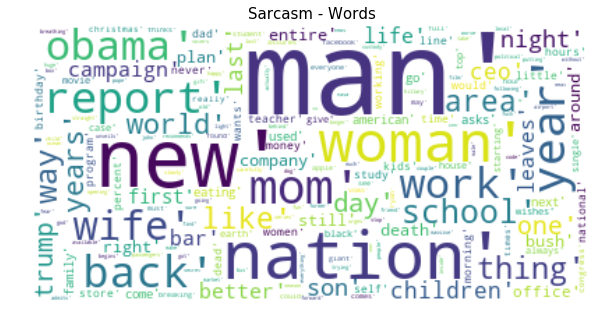

In [0]:
pl.figure(figsize =(10,10))
sarcastic = str(sarc)
wordCloud = WordCloud(background_color="white").generate(sarcastic)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.title('Sarcasm - Words', fontsize=15)
plt.show()

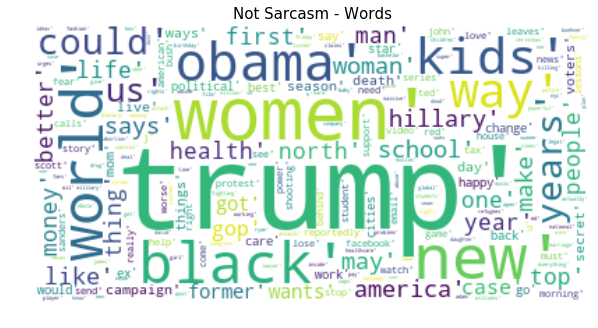

In [0]:
pl.figure(figsize =(10,10))
not_sarcastic = str(no_sarc)
wordCloud = WordCloud(background_color="white").generate(not_sarcastic)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.title('Not Sarcasm - Words', fontsize=15)
plt.show()